In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from fitparse import FitFile
from mpl_toolkits.mplot3d import Axes3D

In [2]:
filename='A1KD3823.FIT'
fitfile = FitFile(filename)

# Get all data messages that are of type record
data={}
for record in fitfile.get_messages('record'):

    # Go through all the data entries in this record
    for r in record:
        try:
            data[r.name].append(r.value)
        except KeyError:
            data[r.name]=[]
            data[r.name].append(r.value)
            print(r.name,r.units)
            
data['position_lat'] = [lat*180/(2**31) if lat is not None else None for lat in data['position_lat']]
data['position_long'] = [long*180/(2**31) if long is not None else None for long in data['position_long']]
data['temperature'] = [temp*1.8+32 for temp in data['temperature']]

altitude None
cadence rpm
distance m
enhanced_altitude m
enhanced_speed m/s
fractional_cadence rpm
heart_rate bpm
position_lat semicircles
position_long semicircles
speed None
temperature C
timestamp None
unknown_87 None
unknown_88 None


In [3]:
data['position_lat'][-1],data['position_long'][-1]

(37.58071121759713, -122.47666971758008)

In [4]:
data.keys()

dict_keys(['altitude', 'cadence', 'distance', 'enhanced_altitude', 'enhanced_speed', 'fractional_cadence', 'heart_rate', 'position_lat', 'position_long', 'speed', 'temperature', 'timestamp', 'unknown_87', 'unknown_88'])

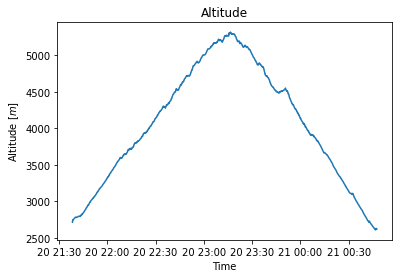

In [5]:
plt.plot(data['timestamp'],data['altitude'])
plt.title('Altitude')
plt.xlabel('Time')
plt.ylabel('Altitude [$m$]')
plt.show()

In [6]:
no_none_lat=[lat for lat in data['position_lat'] if lat is not None]
no_none_long=[long for long in data['position_long'] if long is not None]
scale_factor=0.00001
x_bounds = (min(no_none_lat)-min(no_none_lat)*scale_factor,max(no_none_lat)+max(no_none_lat)*scale_factor)
y_bounds = (min(no_none_long)+min(no_none_long)*scale_factor,max(no_none_long)-max(no_none_long)*scale_factor)

In [7]:
x_bounds,y_bounds

((37.56069353883248, 37.581093897938636),
 (-122.4956461077855, -122.4742709932644))

In [8]:
def plot_map_vs(val):
    plt.style.use('dark_background')

    cutoff = data['altitude'].index(max(data['altitude']))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,8), sharey=True)

    spacing=0.004

    scatt_a = axes[0].scatter(data['position_lat'][:cutoff],data['position_long'][:cutoff],c=data[val][:cutoff],cmap='viridis',marker='.',linestyle='-',vmin=min(data[val]),vmax=max(data[val]))
    axes[0].set_title('Ascent')
    axes[0].set_xlabel('Latitude [$deg$]')
    axes[0].set_ylabel('Longitude [$deg$]')
    axes[0].set_aspect('equal')
    axes[0].set_xlim(x_bounds)
    axes[0].set_ylim(y_bounds)
    axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axes[0].set_xticks(np.arange(x_bounds[0],x_bounds[1],spacing))
    axes[0].set_yticks(np.arange(y_bounds[0],y_bounds[1],spacing))
    axes[0].grid(alpha=0.25)

    scatt_b = axes[1].scatter(data['position_lat'][cutoff:],data['position_long'][cutoff:],c=data[val][cutoff:],cmap='viridis',marker='.',linestyle='-',vmin=min(data[val]),vmax=max(data[val]))
    axes[1].set_title('Descent')
    axes[1].set_xlabel('Latitude [$deg$]')
    #axes[1].set_ylabel('Longitude [$deg$]')
    axes[1].set_aspect('equal')
    axes[1].set_xlim(x_bounds)
    axes[1].set_ylim(y_bounds)
    axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    axes[1].set_xticks(np.arange(x_bounds[0],x_bounds[1],spacing))
    axes[1].set_yticks(np.arange(y_bounds[0],y_bounds[1],spacing))
    axes[1].grid(alpha=0.25)


    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.20, 0.02, 0.6])
    cbar = fig.colorbar(scatt_a, cax=cbar_ax)
    #cbar.set_label('Altitude [$m$]')
    cbar.set_label(val)
    fig.subplots_adjust(wspace=0.1, hspace=0)

    plt.show()

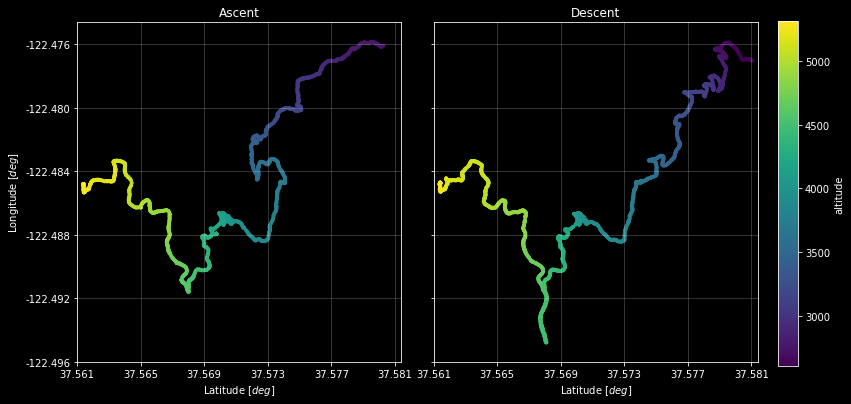

In [9]:
plot_map_vs('altitude')

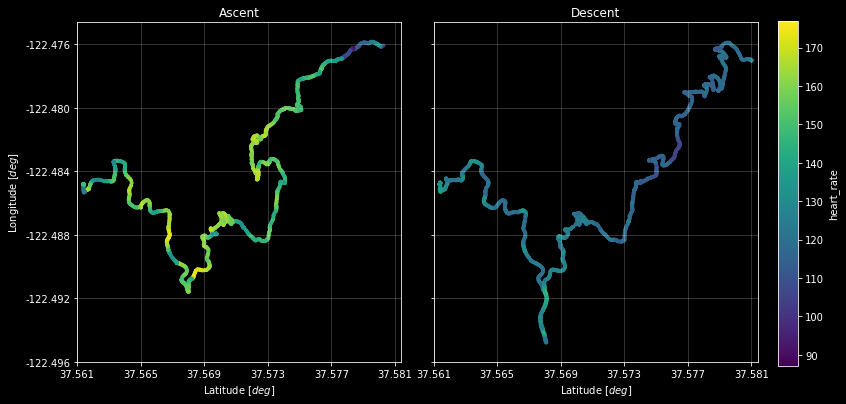

In [10]:
plot_map_vs('heart_rate')

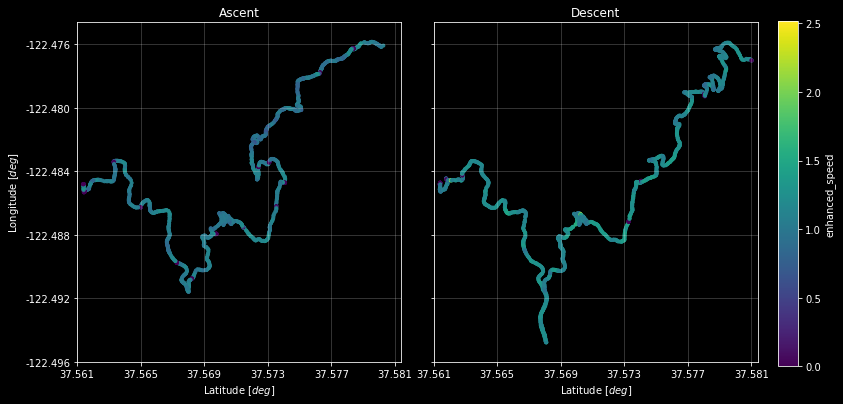

In [11]:
plot_map_vs('enhanced_speed')

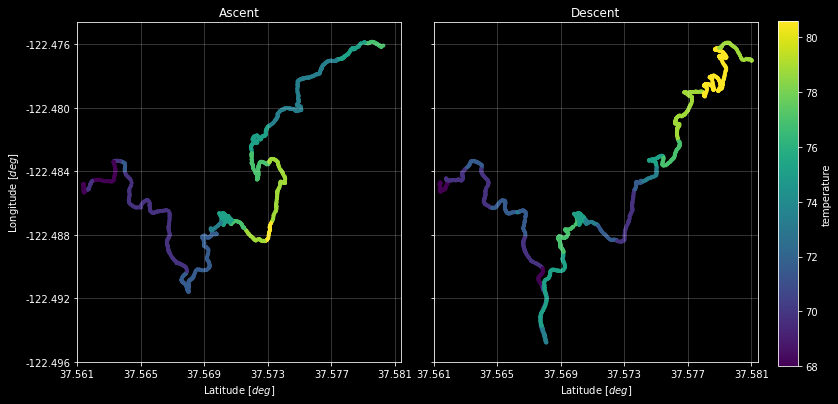

In [12]:
plot_map_vs('temperature')

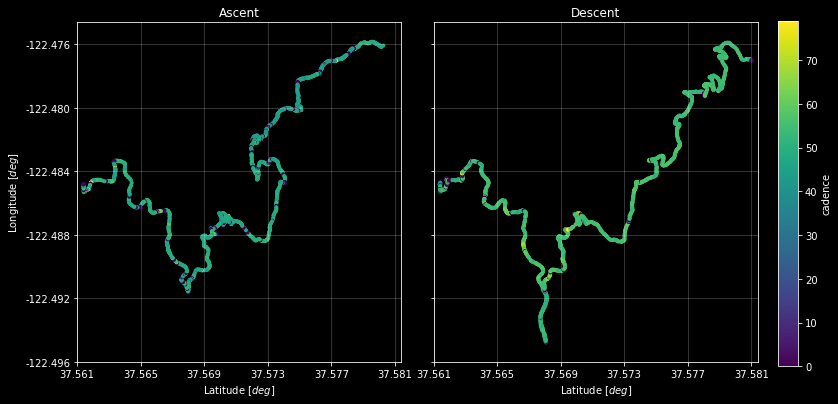

In [13]:
plot_map_vs('cadence')

In [14]:
no_none_lat=[]
no_none_lon=[]
no_none_alt=[]
for lat,lon,alt in zip(data['position_lat'],data['position_long'],data['altitude']):
    if lat is None or lon is None or alt is None:
        continue
    else:
        no_none_lat.append(lat)
        no_none_lon.append(lon)
        no_none_alt.append(alt)
        

FileNotFoundError: [Errno 2] No such file or directory: 'frames/plot_3d_0.png'

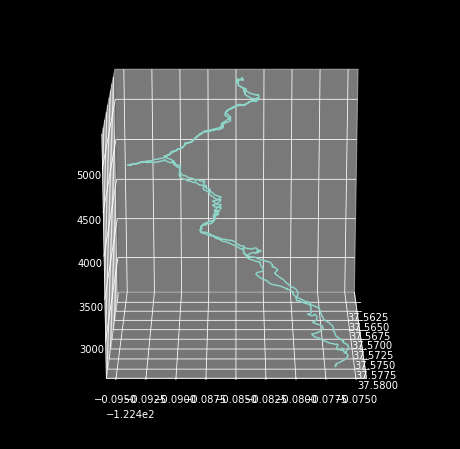

In [15]:
n_frames=360
fig = plt.figure(figsize=(8,8))
Path("./frames").mkdir(parents=True, exist_ok=True)
for ii in np.arange(0,360,1):
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(no_none_lat,no_none_lon,no_none_alt)
    ax.view_init(elev=18, azim=ii)
    plt.savefig("frames/plot_3d_%d.png" % ii, bbox_inches='tight')
    plt.clf()